In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("RDDT.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-03-22,48.880001,51.000000,45.340000,46.000000,46.000000,15936700
1,2024-03-25,47.090000,61.939999,46.080002,59.799999,59.799999,24398800
2,2024-03-26,67.709999,74.900002,63.209999,65.110001,65.110001,35331000
3,2024-03-27,63.759998,63.759998,55.619999,57.750000,57.750000,18758300
4,2024-03-28,54.520000,55.299999,49.099998,49.320000,49.320000,12608100


In [63]:
df.tail()

,Date,Open,High,Low,Close,Volume
31,2024-05-07,47.730000,50.330002,47.400002,49.400002,6241700
32,2024-05-08,55.000000,55.160000,49.700001,51.400002,13509300
33,2024-05-09,51.240002,51.250000,48.250000,50.110001,3909100
34,2024-05-10,50.639999,54.750000,50.380001,53.529999,4450800
35,2024-05-13,56.490002,61.209999,55.590000,58.189999,8072600


<b>Open</b>: Price from the first transaction of a business day.

<b>High</b>: Highest price of the stock on that particular day.

<b>Low</b>: Lowest price of the stock on that day.

<b>Close</b>: Price of stock at the end of trading hours.

<b>Adj Close</b>: Adjusted CLosing price, after taking into account factors such as stock splits, dividends and rights offerings.

<b>Volume</b>: Volume of shares traded.

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    36 non-null     datetime64[ns]
 1   Open    36 non-null     float64       
 2   High    36 non-null     float64       
 3   Low     36 non-null     float64       
 4   Close   36 non-null     float64       
 5   Volume  36 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 1.8 KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,36.000000,36.000000,36.000000,36.000000,36.000000,3.600000e+01
mean,47.049861,49.484889,45.223250,47.094723,47.094723,6.290847e+06
std,6.267571,7.113882,5.127475,5.827906,5.827906,7.450729e+06
min,38.799999,40.605000,37.349998,39.169998,39.169998,1.188300e+06
25%,42.512500,44.037501,41.962998,42.727500,42.727500,2.090875e+06
50%,46.225001,48.565000,44.790001,45.985000,45.985000,2.845600e+06
75%,48.897501,51.242501,46.599999,49.340001,49.340001,6.699425e+06
max,67.709999,74.900002,63.209999,65.110001,65.110001,3.533100e+07


Text(0.5, 1.0, 'Volume of Shares Traded Over Time')

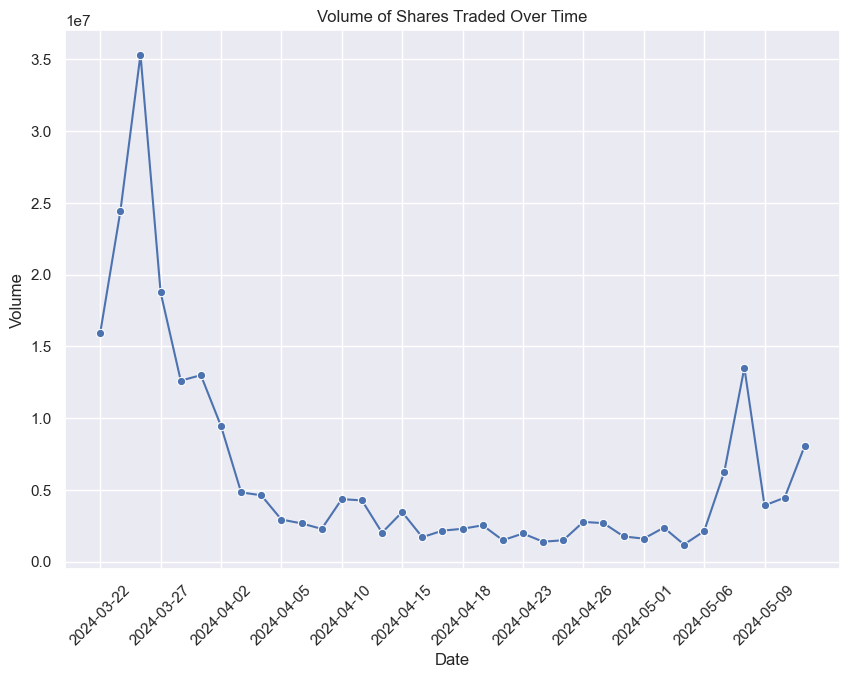

In [50]:
dates=df['Date'].tolist()[::3]
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(data=df, x='Date', y='Volume', marker='o', ax=ax)
ax.set_xticks(dates)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume of Shares Traded Over Time')

Text(0.5, 1.0, 'Opening, Closing, Highest and Lowest Prices')

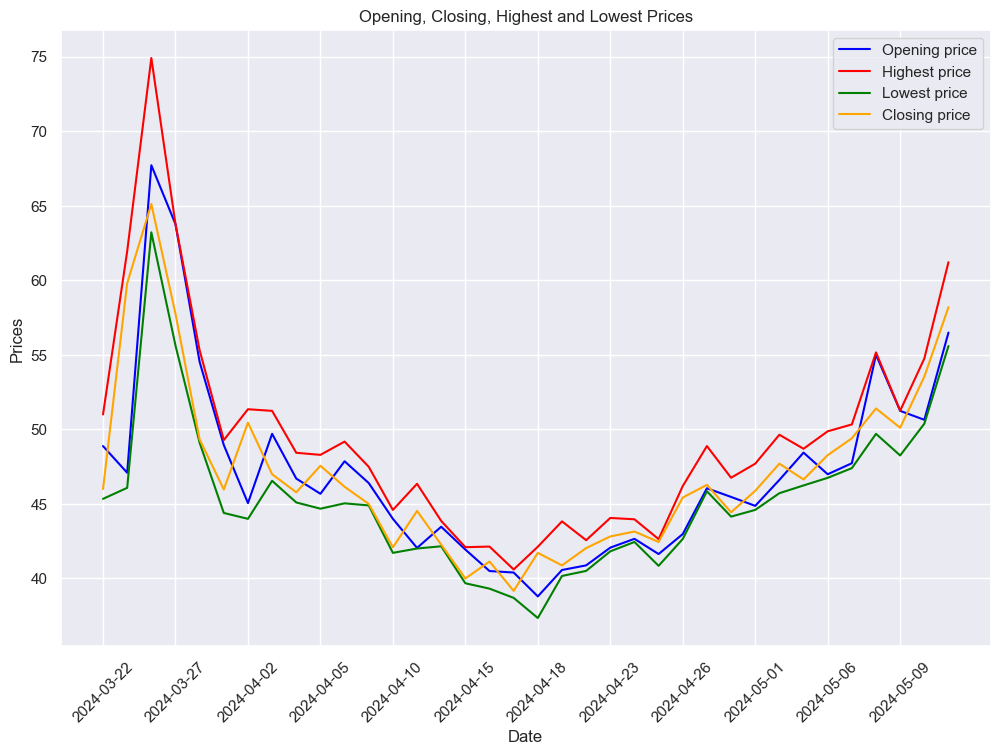

In [54]:
sns.set(style="darkgrid")
fig, ax =plt.subplots(figsize=(12,8))
plt.xticks(rotation=45)
ax.plot(df['Date'], df['Open'], label='Opening price', color='blue')
ax.plot(df['Date'], df['High'], label='Highest price', color='red')
ax.plot(df['Date'], df['Low'], label='Lowest price', color='green')
ax.plot(df['Date'], df['Close'], label='Closing price', color='orange')
ax.set_xticks(dates)
ax.legend()
plt.xlabel('Date')
plt.ylabel('Prices')
plt.title('Opening, Closing, Highest and Lowest Prices')

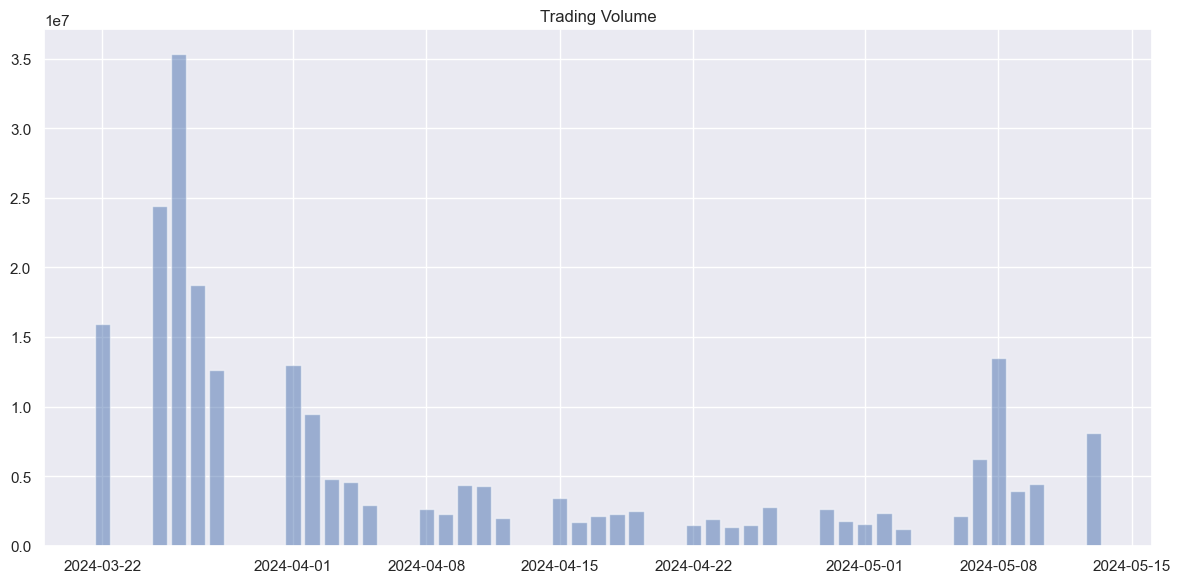

In [60]:
df['Date'] = pd.to_datetime(df['Date'])
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Volume'], alpha=0.5)
plt.title('Trading Volume')
plt.tight_layout()
plt.show()

In [56]:
correlation=df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
print(correlation)

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.923690  0.966891  0.859853   0.859853  0.751823
High       0.923690  1.000000  0.942541  0.975529   0.975529  0.858588
Low        0.966891  0.942541  1.000000  0.910569   0.910569  0.702740
Close      0.859853  0.975529  0.910569  1.000000   1.000000  0.792094
Adj Close  0.859853  0.975529  0.910569  1.000000   1.000000  0.792094
Volume     0.751823  0.858588  0.702740  0.792094   0.792094  1.000000


<b>Closing Price</b> has a high correlation with the <b>Highest and Lowest price</b> of the day. Closing Price and Adjusted Closing price contain the same values.

In [26]:
df.drop(['Adj Close'], axis=1, inplace=True)

In [44]:
features=df[['High', 'Low']]
target=df['Close']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [39]:
 X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [40]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred=model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse=(mean_squared_error(y_test, y_pred))**0.5
mae=mean_absolute_error(y_test, y_pred)

In [42]:
rmse

1.6590990938158638

In [43]:
mae

1.252358904070297

In [37]:
model.predict(np.array([[64.94, 60.11]]))

C:\Users\Lenovo\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57.32227916])

The actual closing price on 15th June 2024 was 60.94.